In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
sum(df.duplicated())

765

In [6]:
df=df.drop_duplicates(df.columns,keep='last')

In [7]:
df.replace({"-":0},inplace=True)

In [8]:
df.replace(' ',np.nan, inplace=True)

In [9]:
df.shape

(83783, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         83783 non-null  int64  
 1   NEIGHBORHOOD                    83783 non-null  object 
 2   BUILDING CLASS CATEGORY         83783 non-null  object 
 3   TAX CLASS AT PRESENT            83045 non-null  object 
 4   BLOCK                           83783 non-null  int64  
 5   LOT                             83783 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       83045 non-null  object 
 8   ADDRESS                         83783 non-null  object 
 9   APARTMENT NUMBER                18849 non-null  object 
 10  ZIP CODE                        83783 non-null  int64  
 11  RESIDENTIAL UNITS               83783 non-null  int64  
 12  COMMERCIAL UNITS                

In [11]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         83783
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [12]:
df=df.fillna(0)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,83783.0,2.999308,1.288668,1.0,2.0,3.0,4.0,5.0
BLOCK,83783.0,4242.903155,3568.789482,1.0,1326.0,3319.0,6295.0,16322.0
LOT,83783.0,376.137415,658.021286,1.0,22.0,50.0,1001.0,9106.0
EASE-MENT,83783.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ZIP CODE,83783.0,10733.236575,1289.764300,0.0,10305.0,11209.0,11357.0,11694.0
RESIDENTIAL UNITS,83783.0,1.999976,16.569118,0.0,0.0,1.0,2.0,1844.0
COMMERCIAL UNITS,83783.0,0.183677,8.576582,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,83783.0,2.213504,18.777727,0.0,1.0,1.0,2.0,2261.0
YEAR BUILT,83783.0,1789.814318,536.565051,0.0,1920.0,1940.0,1965.0,2017.0
TAX CLASS AT TIME OF SALE,83783.0,1.654035,0.814588,1.0,1.0,2.0,2.0,4.0


In [15]:
df.drop('EASE-MENT', axis=1, inplace=True)

In [16]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [17]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [18]:
for col in df.columns:
    print(col,df[col].unique())

BOROUGH [1 2 3 4 5]
NEIGHBORHOOD ['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE/MORRIS HEIGHTS' 'HUNTS POINT'
 'KIN

 '2017-06-04 00:00:00']


In [19]:
df.columns.unique()

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [20]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,0,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,0,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,0,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,0,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,0,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


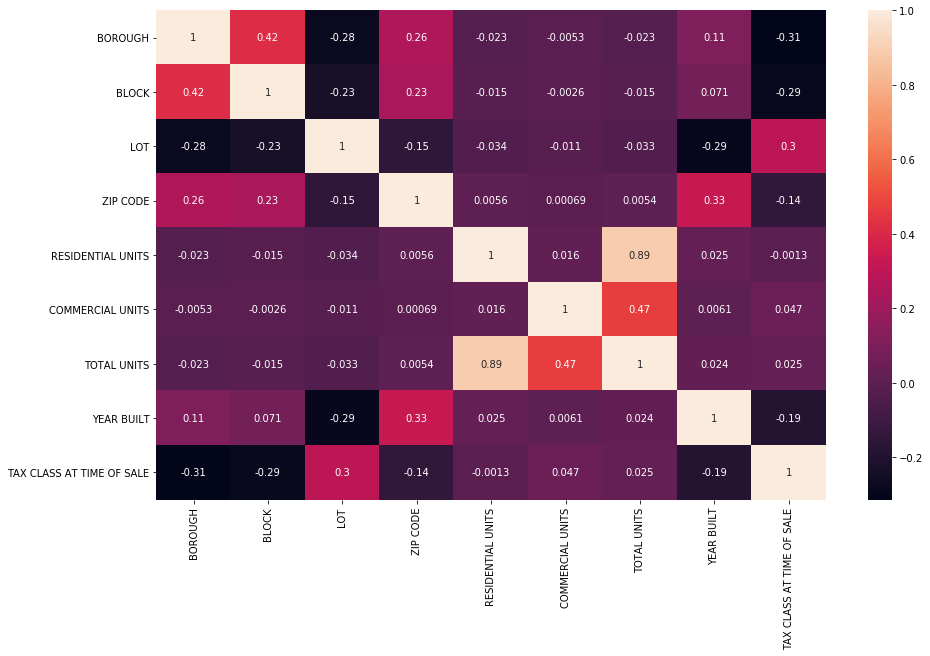

In [21]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

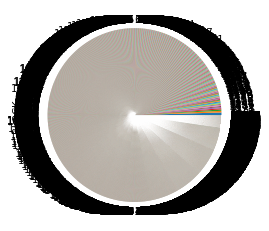

In [22]:
df.BLOCK.value_counts().plot(kind='pie')

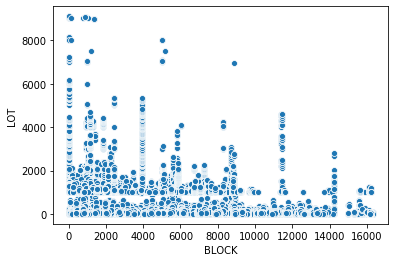

In [23]:
sns.scatterplot(x=df["BLOCK"], y=df["LOT"], 
data=df)

In [24]:
df.corr().abs()['YEAR BUILT'].sort_values(ascending = False)

YEAR BUILT                   1.000000
ZIP CODE                     0.330529
LOT                          0.290821
TAX CLASS AT TIME OF SALE    0.189154
BOROUGH                      0.108354
BLOCK                        0.070965
RESIDENTIAL UNITS            0.025165
TOTAL UNITS                  0.024215
COMMERCIAL UNITS             0.006100
Name: YEAR BUILT, dtype: float64

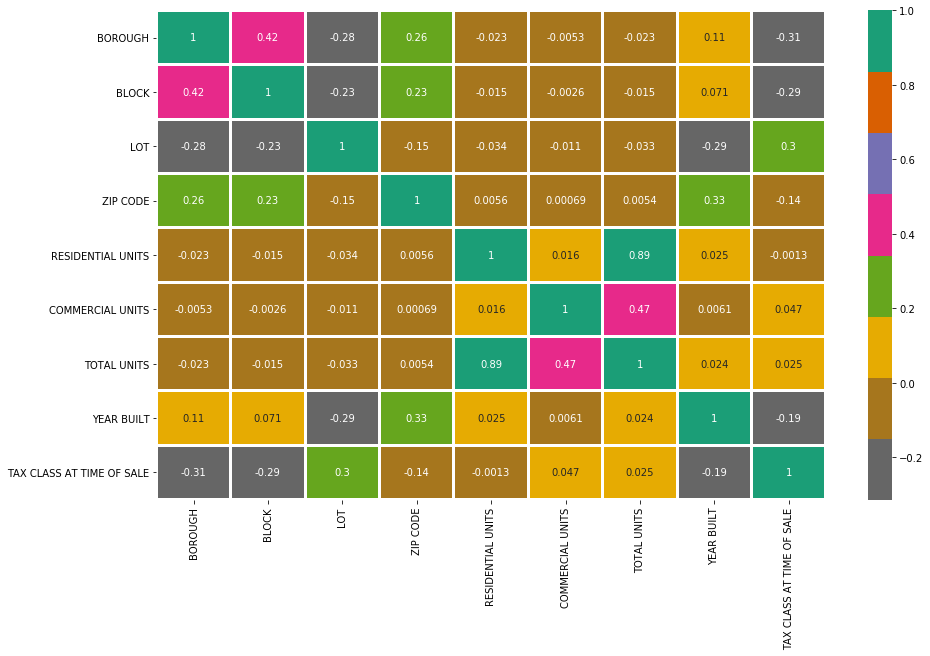

In [25]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)


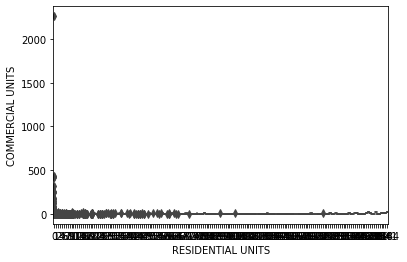

In [26]:
sns.boxplot(x=df["RESIDENTIAL UNITS"], y=df["COMMERCIAL UNITS"], data=df)

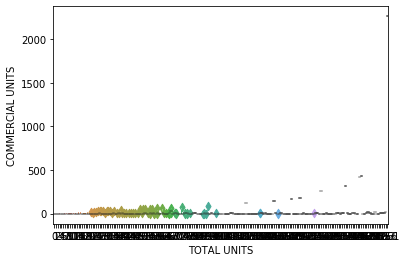

In [27]:
sns.boxenplot(x=df["TOTAL UNITS"], y=df["COMMERCIAL UNITS"], 
data=df)

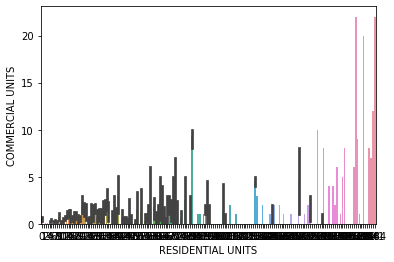

In [28]:
sns.barplot(x=df["RESIDENTIAL UNITS"], y=df["COMMERCIAL UNITS"], data=df)

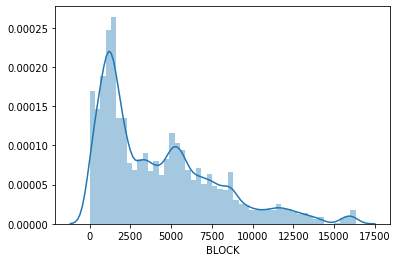

In [29]:
sns.distplot(df['BLOCK'])

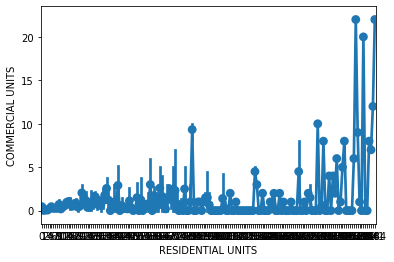

In [30]:
sns.pointplot(x=df["RESIDENTIAL UNITS"], y=df["COMMERCIAL UNITS"], data=df)

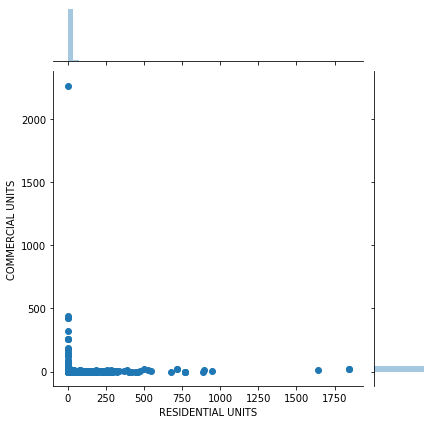

In [31]:
sns.jointplot(x=df["RESIDENTIAL UNITS"], y=df["COMMERCIAL UNITS"], data=df)

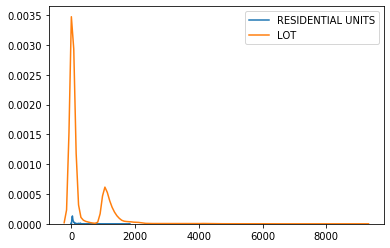

In [32]:
sns.kdeplot(df['RESIDENTIAL UNITS'])
#sns.kdeplot(df['student2'])
sns.kdeplot(df['LOT'])

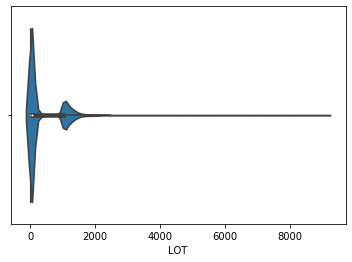

In [33]:
sns.violinplot(df['RESIDENTIAL UNITS'])
#sns.kdeplot(df['student2'])
sns.violinplot(df['LOT'])

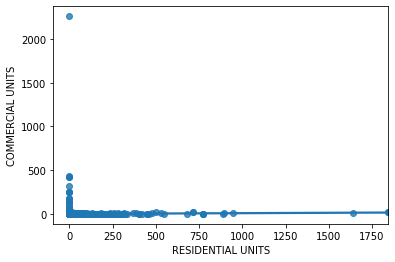

In [34]:
sns.regplot(x=df["RESIDENTIAL UNITS"], y=df["COMMERCIAL UNITS"], 
data=df)

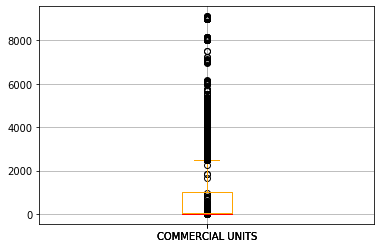

In [35]:
df.boxplot(column="RESIDENTIAL UNITS")
df.boxplot(column="LOT",color='orange')
df.boxplot(column="COMMERCIAL UNITS",color='red')

In [ ]:
sns.pairplot(df)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df.rename={'COMMERCIAL UNITS':'COMMERCIAL_UNITS'}

In [ ]:
df.rename={'RESIDENTIAL UNITS':'RESIDENTIAL_UNITS'}

In [ ]:
df.head()

In [ ]:
df2=pd.read_csv('file:///F:/nyc-rolling-sales(2).csv')
df2.head()